# Data Cleaning and Preparation

This section loads the dataset and performs initial cleaning:
- Merges similar columns (e.g., `Objective`, `Purpose`, and savings objectives) into a unified `Goal` column.
- Consolidates reasons for investment into a single multi-label field.
- Removes empty or duplicate entries.

**Why:**  
This ensures that subsequent analyses are based on clean, consolidated data, making visualizations and cross-tabulations more meaningful.

---

# Basic Visualizations

Here, we visualize:
- **Gender Distribution:** Bar plot showing the number of respondents by gender.
- **Age Distribution:** Histogram of respondent ages.
- **Primary Investment Avenue:** Bar plot of the most common investment avenues.

**How to read:**  
- Taller bars indicate higher counts.
- These plots provide a demographic overview of the survey participants.

---

# Investment Goals and Factors

This section explores:
- **Investment Goals:** Frequency of different goals (e.g., wealth creation, retirement).
- **Factors Considered:** What factors respondents consider when investing.

**How to read:**  
- Bar plots show which goals and factors are most common.
- Useful for understanding what motivates investment decisions.

---

# Cross-Demographic Insights

Here, we analyze:
- **Goals by Gender:** Which investment goals are most common for each gender.
- **Factors by Age Group:** What factors are prioritized by different age groups.

**How to read:**  
- Count plots with color-coded bars for each demographic group.
- Helps identify demographic trends in investment motivations and considerations.

---

# Ranking Preferences

This section visualizes:
- **Average Ranking of Investment Options:** Lower average rank means higher preference.

**How to read:**  
- Bar plot with investment options on the y-axis and average rank on the x-axis.
- Options with bars further to the left are more preferred.

---

# Additional Insights

Includes:
- **Expected Returns by Age Group:** Boxplot showing the distribution of expected returns for each age group.
- **Investment Monitoring Frequency:** How often respondents monitor their investments.
- **Sources of Information:** Where respondents get their investment information.

**How to read:**  
- Boxplots show median, quartiles, and outliers.
- Count plots show the popularity of each response.

---

# Preferences vs. Actual Behavior

This section compares what people say they prefer or aim for with what they actually do:
- **Top Investment Preference vs Actual Avenue:** Heatmap showing how often the top-ranked preference matches the actual investment avenue.
- **Goals vs Actual Avenue:** Heatmap of stated goals versus actual investments.

**How to read:**  
- Each cell shows the count or percentage of respondents for each combination.
- Darker colors indicate higher alignment or frequency.

---

# Cross-Demographic Alignment Analysis

Here, we break down alignment by demographic:
- **By Gender:** How well top preferences and goals align with actual investments for each gender.
- **By Age Group:** Same analysis, split by age group.

**How to read:**  
- Normalized heatmaps (values sum to 1 per row) show the proportion of each group whose actual investments align with their stated goals or preferences.
- High values along the diagonal indicate strong alignment.

---

# Interpretation

- **Alignment:** High values along the diagonal in heatmaps suggest that respondents’ actual investments match their stated preferences or goals.
- **Demographic Differences:** Comparing across gender and age group can reveal which groups are more or less likely to act according to their stated intentions.

---


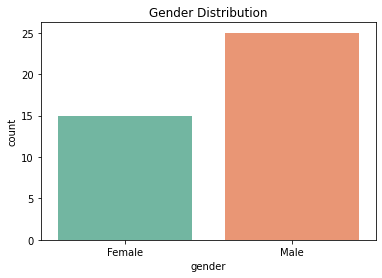

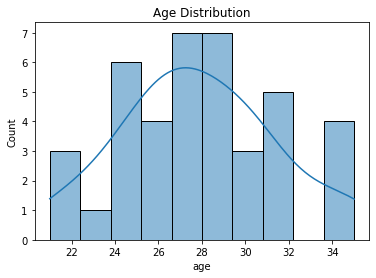

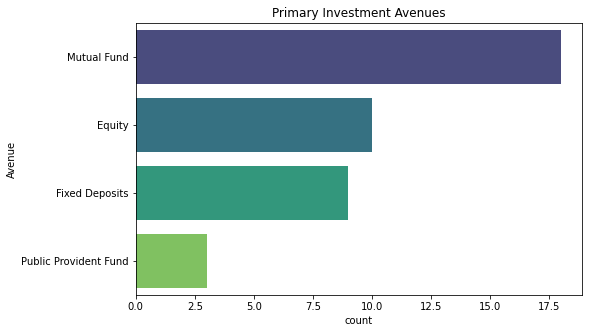

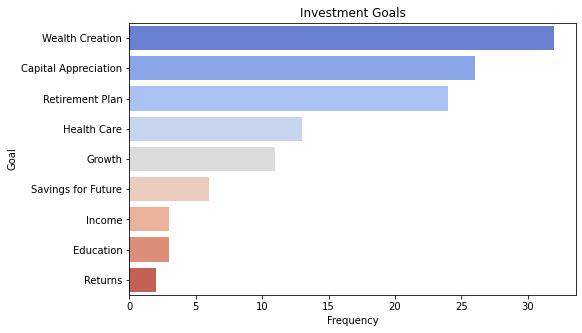

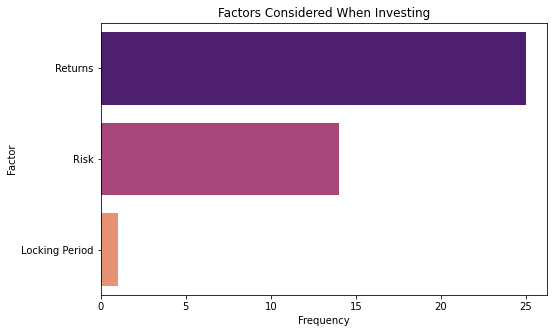

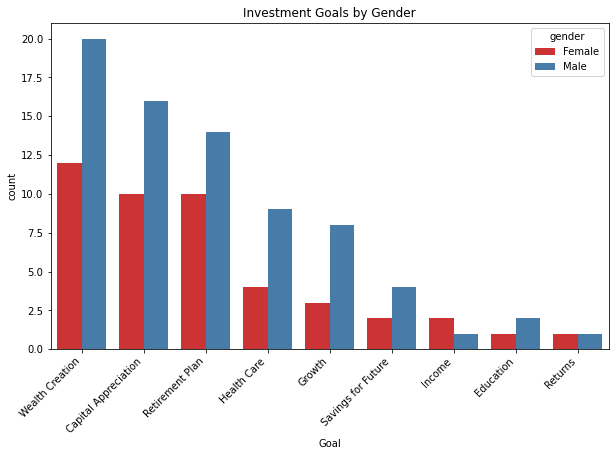

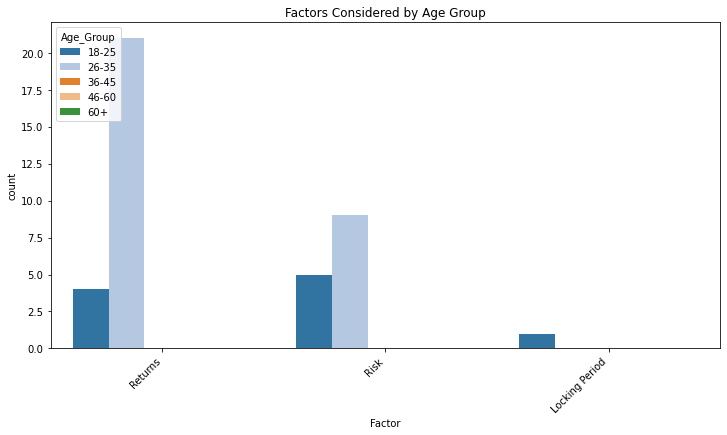

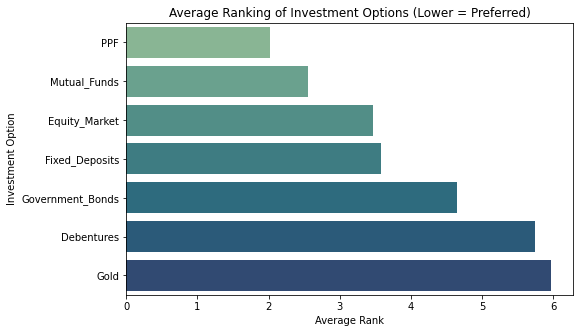

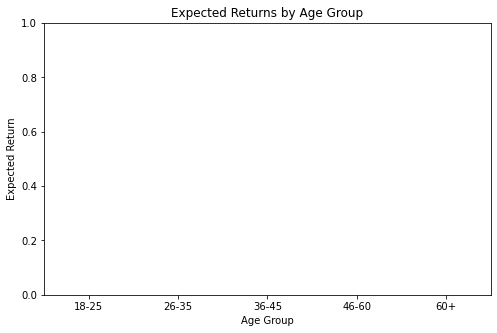

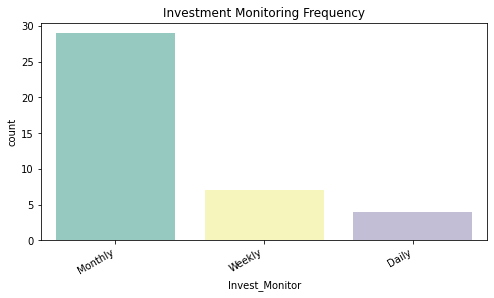

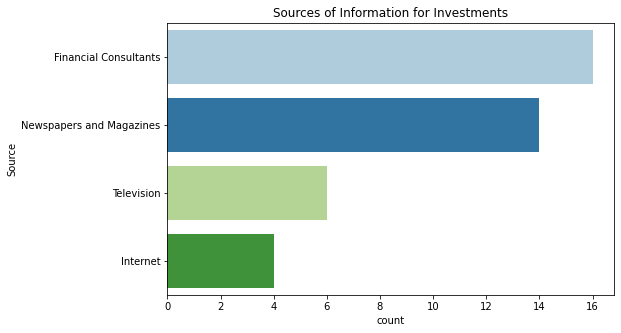

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (already renamed)
df = pd.read_csv("Finance_data.csv")

# -------------------------------
# Step 1: Streamline / Clean Data
# -------------------------------

# Merge Objectives and Purpose into one (if they overlap heavily)
df['Goal'] = df[['Objective', 'Purpose']].fillna('').agg(' | '.join, axis=1).str.strip(' |')

# Simplify savings objectives (merge with Goal if redundant)
df['Goal'] = df[['Goal', 'What are your savings objectives?']].fillna('').agg(' | '.join, axis=1).str.strip(' |')

# Consolidate "Reasons" into one multi-label field
df['Reasons'] = df[['Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD']].fillna('').agg(' | '.join, axis=1).str.strip(' |')

# Drop empty duplicates
df['Goal'] = df['Goal'].replace('', pd.NA)
df['Reasons'] = df['Reasons'].replace('', pd.NA)

# -------------------------------
# Step 2: Basic Visualizations
# -------------------------------

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.savefig("gender_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.savefig("age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# Primary investment avenue
plt.figure(figsize=(8,5))
sns.countplot(y="Avenue", data=df, order=df['Avenue'].value_counts().index, palette="viridis")
plt.title("Primary Investment Avenues")
plt.savefig("primary_investment_avenues.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# -------------------------------
# Step 3: Objectives & Factors
# -------------------------------

# Explode multi-label Goals
all_goals = df['Goal'].dropna().str.split('|').explode().str.strip()
goal_counts = all_goals.value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=goal_counts.values, y=goal_counts.index, palette="coolwarm")
plt.title("Investment Goals")
plt.xlabel("Frequency")
plt.ylabel("Goal")
plt.savefig("investment_goals.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# Explode Factors
all_factors = df['Factor'].dropna().str.split(',').explode().str.strip()
factor_counts = all_factors.value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=factor_counts.values, y=factor_counts.index, palette="magma")
plt.title("Factors Considered When Investing")
plt.xlabel("Frequency")
plt.ylabel("Factor")
plt.savefig("factors_investing.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# -------------------------------
# Step 4: Cross-Demographic Insights
# -------------------------------

# Goals by Gender
goals_by_gender = df.dropna(subset=['gender','Goal']).copy()
goals_by_gender = goals_by_gender.assign(Goal=goals_by_gender['Goal'].str.split('|')).explode('Goal')
goals_by_gender['Goal'] = goals_by_gender['Goal'].str.strip()

plt.figure(figsize=(10,6))
sns.countplot(data=goals_by_gender, x="Goal", hue="gender",
              order=goals_by_gender['Goal'].value_counts().index, palette="Set1")
plt.xticks(rotation=45, ha='right')
plt.title("Investment Goals by Gender")
plt.savefig("investment_goals_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# Factors by Age Group
df['Age_Group'] = pd.cut(df['age'], bins=[18,25,35,45,60,100],
                         labels=['18-25','26-35','36-45','46-60','60+'])
factors_by_age = df.dropna(subset=['Age_Group','Factor']).copy()
factors_by_age = factors_by_age.assign(Factor=factors_by_age['Factor'].str.split(',')).explode('Factor')
factors_by_age['Factor'] = factors_by_age['Factor'].str.strip()

plt.figure(figsize=(12,6))
sns.countplot(data=factors_by_age, x="Factor", hue="Age_Group",
              order=factors_by_age['Factor'].value_counts().index, palette="tab20")
plt.xticks(rotation=45, ha='right')
plt.title("Factors Considered by Age Group")
plt.savefig("factors_by_age_group.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# -------------------------------
# Step 5: Ranking Preferences
# -------------------------------

ranking_cols = ["Mutual_Funds","Equity_Market","Debentures",
                "Government_Bonds","Fixed_Deposits","PPF","Gold"]
avg_ranks = df[ranking_cols].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_ranks.values, y=avg_ranks.index, palette="crest")
plt.title("Average Ranking of Investment Options (Lower = Preferred)")
plt.xlabel("Average Rank")
plt.ylabel("Investment Option")
plt.savefig("investment_option_rankings.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# -------------------------------
# Step 6: Additional Insights
# -------------------------------

# 6a. Expected returns by age group (with numeric conversion)
if {'Expect','Age_Group'}.issubset(df.columns):
    # Convert to numeric, coerce errors to NaN
    df['Expect_num'] = pd.to_numeric(df['Expect'], errors='coerce')
    
    # Drop rows where conversion failed
    exp_df = df.dropna(subset=['Expect_num', 'Age_Group']).copy()
    
    plt.figure(figsize=(8,5))
    sns.boxplot(data=exp_df, x='Age_Group', y='Expect_num', palette="Set2")
    plt.title("Expected Returns by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Expected Return")
    plt.savefig("expected_returns_by_agegroup.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()


# 6b. Investment monitoring frequency
if 'Invest_Monitor' in df.columns:
    all_monitor = df['Invest_Monitor'].dropna().str.split(',').explode().str.strip()
    if not all_monitor.empty:
        plt.figure(figsize=(8,4))
        sns.countplot(x=all_monitor, order=all_monitor.value_counts().index, palette="Set3")
        plt.title("Investment Monitoring Frequency")
        plt.xticks(rotation=30, ha="right")
        plt.savefig("invest_monitor_frequency.png", dpi=300, bbox_inches="tight")
        plt.show()
        plt.close()

# 6c. Sources of information
if 'Source' in df.columns:
    all_sources = df['Source'].dropna().str.split(',').explode().str.strip()
    if not all_sources.empty:
        plt.figure(figsize=(8,5))
        sns.countplot(y=all_sources, order=all_sources.value_counts().index, palette="Paired")
        plt.title("Sources of Information for Investments")
        plt.savefig("sources_info.png", dpi=300, bbox_inches="tight")
        plt.show()
        plt.close()


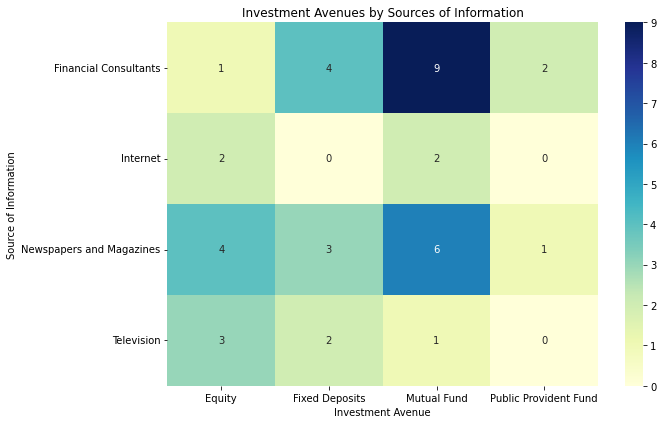

In [6]:
# Explode multi-label columns: Source and Avenue
df_src = df.dropna(subset=['Source','Avenue']).copy()

# Split multi-selects (commas or '|')
df_src = df_src.assign(Source=df_src['Source'].str.split(',')).explode('Source')
df_src = df_src.assign(Avenue=df_src['Avenue'].str.split(',')).explode('Avenue')

# Strip whitespace
df_src['Source'] = df_src['Source'].str.strip()
df_src['Avenue'] = df_src['Avenue'].str.strip()

# Count combinations
source_avenue_counts = df_src.groupby(['Source','Avenue']).size().reset_index(name='Count')

# Pivot for heatmap
pivot = source_avenue_counts.pivot(index='Source', columns='Avenue', values='Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Investment Avenues by Sources of Information")
plt.xlabel("Investment Avenue")
plt.ylabel("Source of Information")
plt.tight_layout()
plt.savefig("source_vs_investment.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


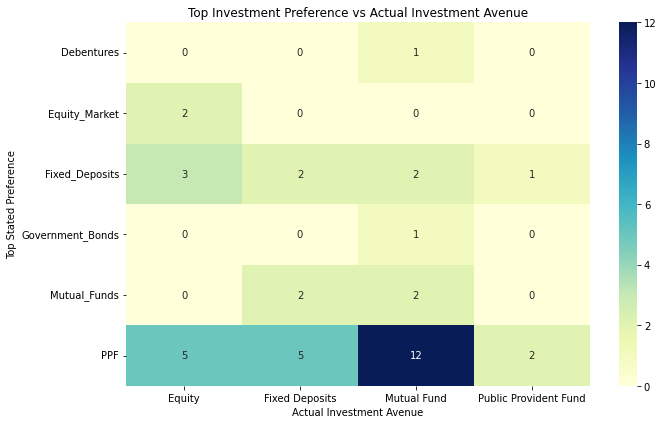

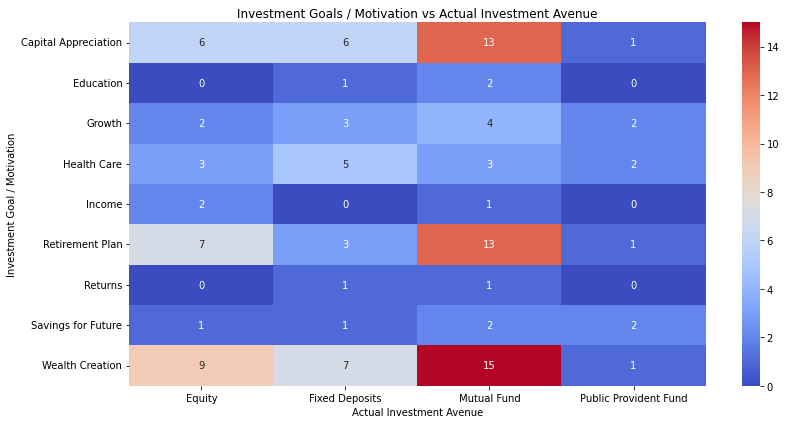

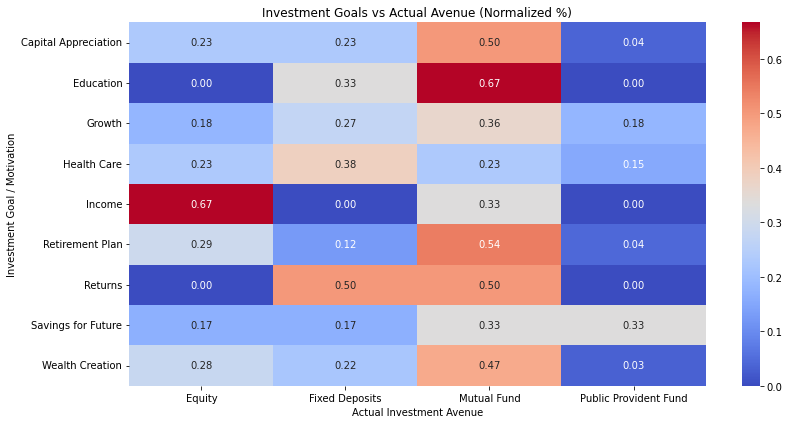

In [7]:
# ----------------------------------------
# Step 7: Compare Preferences / Goals vs Actual Behavior
# ----------------------------------------

# 7a. Explode investment preferences (ranked options)
pref_cols = ["Mutual_Funds","Equity_Market","Debentures","Government_Bonds","Fixed_Deposits","PPF","Gold"]

# Convert to numeric just in case
for c in pref_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Identify top preference per respondent
df['Top_Investment_Preference'] = df[pref_cols].idxmin(axis=1)  # Lower rank = higher preference

# 7b. Compare Top Investment Preference vs Actual Investment Avenue
plt.figure(figsize=(10,6))
cross_pref_actual = pd.crosstab(df['Top_Investment_Preference'], df['Avenue'])
sns.heatmap(cross_pref_actual, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Top Investment Preference vs Actual Investment Avenue")
plt.xlabel("Actual Investment Avenue")
plt.ylabel("Top Stated Preference")
plt.tight_layout()
plt.savefig("preference_vs_actual.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# 7c. Explode Goals and compare to investment behavior
df_goals = df.dropna(subset=['Goal','Avenue']).copy()
df_goals = df_goals.assign(Goal=df_goals['Goal'].str.split('|')).explode('Goal')
df_goals['Goal'] = df_goals['Goal'].str.strip()

# Create a cross-tab of Goals vs Actual Avenue
plt.figure(figsize=(12,6))
cross_goal_actual = pd.crosstab(df_goals['Goal'], df_goals['Avenue'])
sns.heatmap(cross_goal_actual, annot=True, fmt='d', cmap="coolwarm")
plt.title("Investment Goals / Motivation vs Actual Investment Avenue")
plt.xlabel("Actual Investment Avenue")
plt.ylabel("Investment Goal / Motivation")
plt.tight_layout()
plt.savefig("goal_vs_actual.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# Optional: normalize to % per row to see alignment ratios
cross_goal_actual_norm = cross_goal_actual.div(cross_goal_actual.sum(axis=1), axis=0)
plt.figure(figsize=(12,6))
sns.heatmap(cross_goal_actual_norm, annot=True, fmt='.2f', cmap="coolwarm")
plt.title("Investment Goals vs Actual Avenue (Normalized %)")
plt.xlabel("Actual Investment Avenue")
plt.ylabel("Investment Goal / Motivation")
plt.tight_layout()
plt.savefig("goal_vs_actual_normalized.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


## Investment Avenues and Their Alignment with Goals

Below is a summary of each investment avenue and the types of goals they commonly align with. Use this as a reference when interpreting the heatmap of "Investment Goals vs Actual Investment Avenue":

- **Mutual Funds:**  
  Typically chosen for wealth creation, long-term growth, and retirement planning. They offer diversification and professional management, making them suitable for both moderate and aggressive goals.

- **Equity Market (Stocks):**  
  Preferred for high growth and wealth accumulation goals. Equities are riskier but can deliver higher returns, aligning with goals like wealth creation, early retirement, or funding major life events.

- **Debentures:**  
  Suited for those seeking regular income and capital preservation. Debentures are fixed-income instruments, aligning with goals such as stable income, capital protection, or conservative growth.

- **Government Bonds:**  
  Chosen for safety and steady returns. They align with goals like capital preservation, retirement income, and low-risk savings.

- **Fixed Deposits (FD):**  
  Popular for short-term savings, emergency funds, and capital safety. FDs are low-risk and provide guaranteed returns, making them suitable for conservative goals.

- **Public Provident Fund (PPF):**  
  Used for long-term savings and retirement planning. PPFs offer tax benefits and stable returns, aligning with goals like retirement corpus building and long-term wealth preservation.

- **Gold:**  
  Often selected for wealth preservation, hedging against inflation, and cultural/family goals (e.g., marriage, inheritance). Gold is less about income and more about security and tradition.

**How to interpret the heatmap:**  
- Cells with higher values along the diagonal indicate strong alignment between a stated goal and the chosen investment avenue (e.g., "Retirement" goal with "PPF" or "Mutual Funds").
- Off-diagonal cells show cases where the investment avenue does not traditionally match the stated goal, which may indicate a gap in financial literacy or access.
- Use the above descriptions to assess whether respondents are choosing avenues that best fit their goals.

---

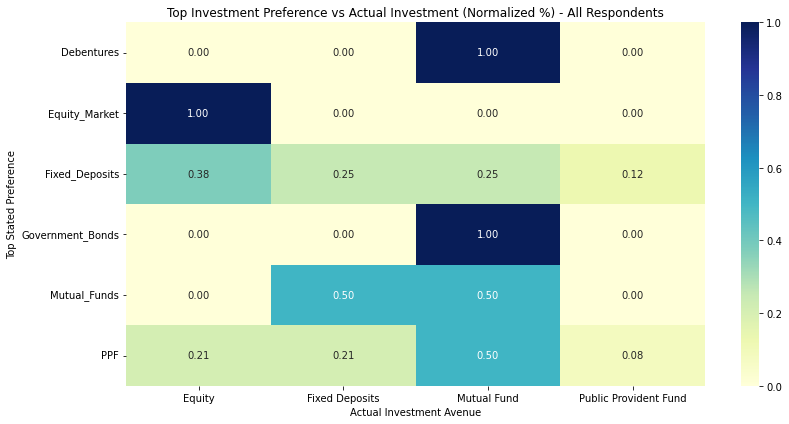

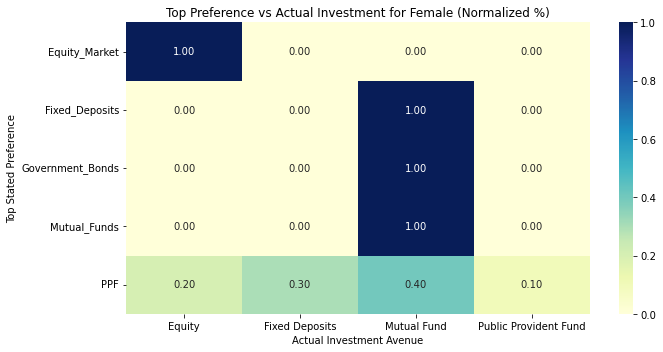

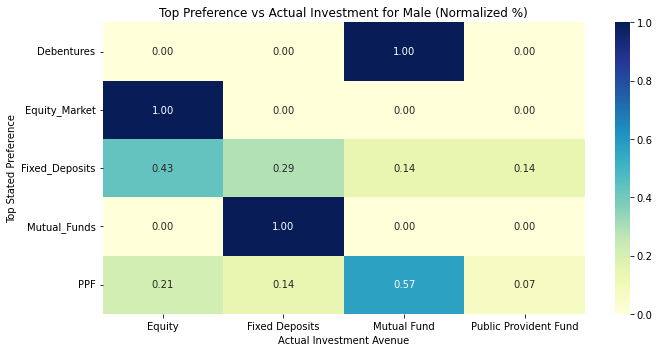

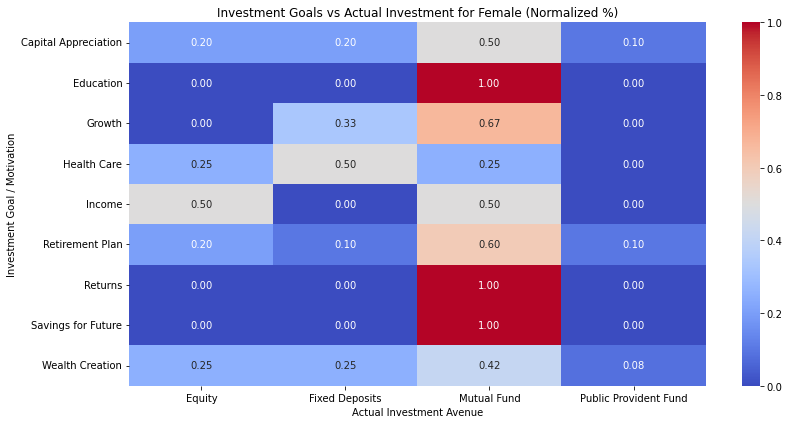

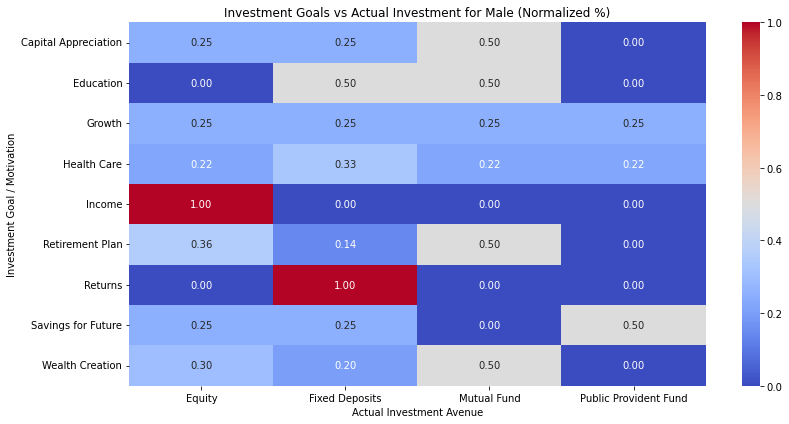

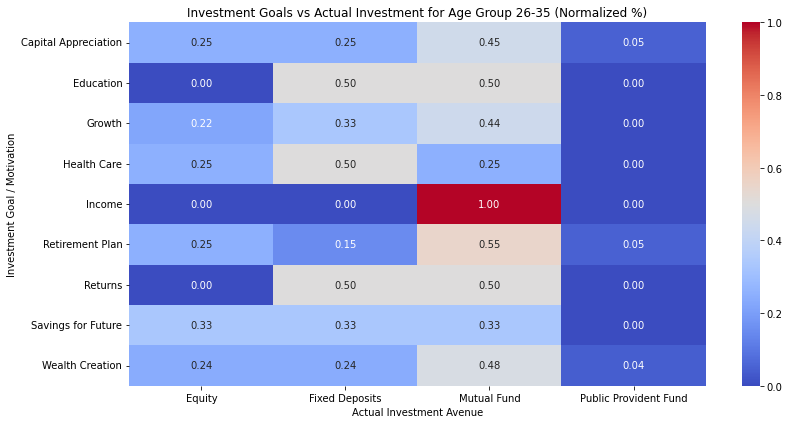

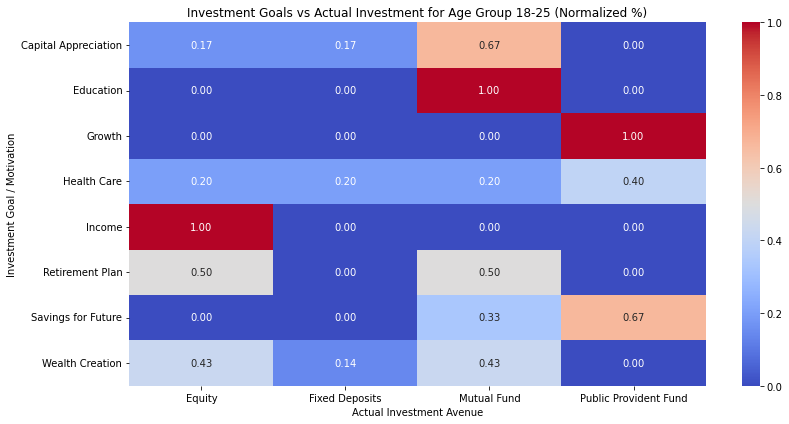

In [8]:
# ----------------------------------------
# Step 8: Cross-Demographic Alignment Analysis
# ----------------------------------------

# 8a. Top Investment Preference vs Actual Investment by Gender
plt.figure(figsize=(12,6))
cross_pref_gender = pd.crosstab(df['Top_Investment_Preference'], df['Avenue'], 
                                rownames=['Top Preference'], colnames=['Actual Avenue'])
cross_pref_gender_norm = cross_pref_gender.div(cross_pref_gender.sum(axis=1), axis=0)

sns.heatmap(cross_pref_gender_norm, annot=True, fmt='.2f', cmap="YlGnBu")
plt.title("Top Investment Preference vs Actual Investment (Normalized %) - All Respondents")
plt.xlabel("Actual Investment Avenue")
plt.ylabel("Top Stated Preference")
plt.tight_layout()
plt.savefig("preference_vs_actual_normalized.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# Now split by Gender
for gender in df['gender'].dropna().unique():
    df_gender = df[df['gender']==gender]
    cross_pref_gender = pd.crosstab(df_gender['Top_Investment_Preference'], df_gender['Avenue'])
    cross_pref_gender_norm = cross_pref_gender.div(cross_pref_gender.sum(axis=1), axis=0)
    
    plt.figure(figsize=(10,5))
    sns.heatmap(cross_pref_gender_norm, annot=True, fmt='.2f', cmap="YlGnBu")
    plt.title(f"Top Preference vs Actual Investment for {gender} (Normalized %)")
    plt.xlabel("Actual Investment Avenue")
    plt.ylabel("Top Stated Preference")
    plt.tight_layout()
    plt.savefig(f"preference_vs_actual_{gender}.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

# 8b. Investment Goals vs Actual Investment by Gender
df_goals_gender = df.dropna(subset=['Goal','Avenue']).copy()
df_goals_gender = df_goals_gender.assign(Goal=df_goals_gender['Goal'].str.split('|')).explode('Goal')
df_goals_gender['Goal'] = df_goals_gender['Goal'].str.strip()

for gender in df['gender'].dropna().unique():
    df_g = df_goals_gender[df_goals_gender['gender']==gender]
    cross_goal_actual = pd.crosstab(df_g['Goal'], df_g['Avenue'])
    cross_goal_actual_norm = cross_goal_actual.div(cross_goal_actual.sum(axis=1), axis=0)
    
    plt.figure(figsize=(12,6))
    sns.heatmap(cross_goal_actual_norm, annot=True, fmt='.2f', cmap="coolwarm")
    plt.title(f"Investment Goals vs Actual Investment for {gender} (Normalized %)")
    plt.xlabel("Actual Investment Avenue")
    plt.ylabel("Investment Goal / Motivation")
    plt.tight_layout()
    plt.savefig(f"goal_vs_actual_{gender}.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

# 8c. Optional: Goals vs Actual Investment by Age_Group
for age_group in df['Age_Group'].dropna().unique():
    df_a = df_goals_gender[df_goals_gender['Age_Group']==age_group]
    cross_goal_actual = pd.crosstab(df_a['Goal'], df_a['Avenue'])
    cross_goal_actual_norm = cross_goal_actual.div(cross_goal_actual.sum(axis=1), axis=0)
    
    plt.figure(figsize=(12,6))
    sns.heatmap(cross_goal_actual_norm, annot=True, fmt='.2f', cmap="coolwarm")
    plt.title(f"Investment Goals vs Actual Investment for Age Group {age_group} (Normalized %)")
    plt.xlabel("Actual Investment Avenue")
    plt.ylabel("Investment Goal / Motivation")
    plt.tight_layout()
    plt.savefig(f"goal_vs_actual_age_{age_group}.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()


Overall alignment: 0.00%


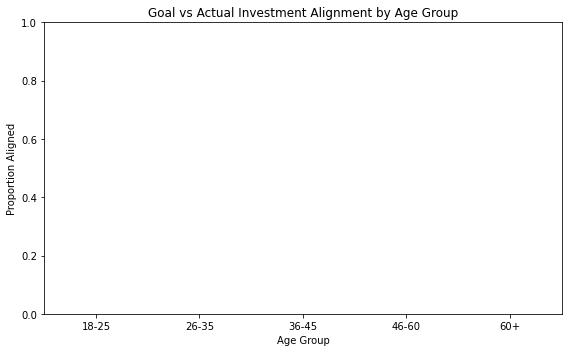

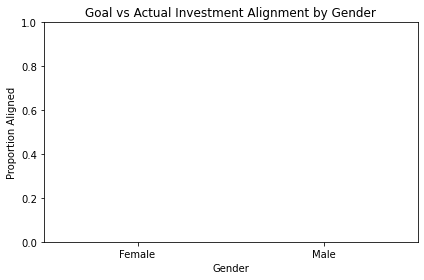

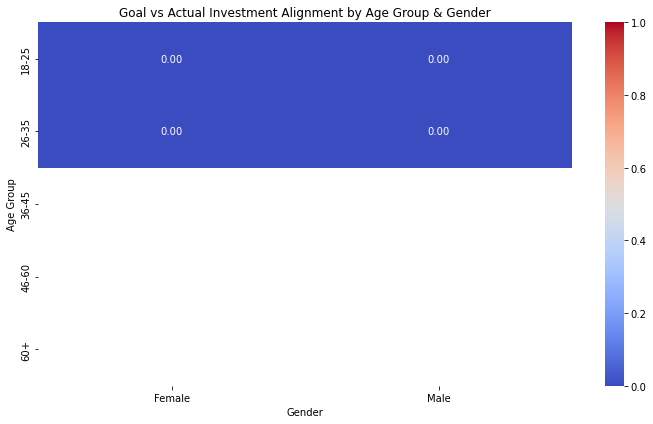

In [10]:
# ----------------------------------------
# Step 9: Compute Alignment Score (Goal vs Actual Investment) - Robust Version
# ----------------------------------------

# 1. Inspect unique values to normalize
df_goals_al = df.dropna(subset=['Goal','Avenue']).copy()
df_goals_al['Goal'] = df_goals_al['Goal'].str.strip().str.title()
df_goals_al['Avenue'] = df_goals_al['Avenue'].str.strip().str.replace(" ","_").str.title()

# Explode multi-label Goals
df_goals_al = df_goals_al.assign(Goal=df_goals_al['Goal'].str.split('|')).explode('Goal')
df_goals_al['Goal'] = df_goals_al['Goal'].str.strip()

# 2. Define robust mapping of goals to ideal investment avenues
goal_to_avenue = {
    'Income': ['Fixed_Deposits', 'Ppf', 'Gold'],
    'Education': ['Mutual_Funds', 'Ppf'],
    'Growth': ['Equity_Market', 'Mutual_Funds', 'Ppf'],
    'Capital_Appreciation': ['Equity_Market', 'Mutual_Funds'],
    'Liquidity': ['Stock_Marktet', 'Fixed_Deposits'],
    # Add any other observed goals
}

# 3. Compute alignment
def check_alignment(row):
    ideal = goal_to_avenue.get(row['Goal'].replace(" ","_"), [])
    return int(row['Avenue'] in ideal)

df_goals_al['Aligned'] = df_goals_al.apply(check_alignment, axis=1)

# ----------------------------------------
# 9a. Overall alignment
overall_alignment = df_goals_al['Aligned'].mean()
print(f"Overall alignment: {overall_alignment:.2%}")

# ----------------------------------------
# 9b. Alignment by Age Group
df_goals_al['Age_Group'] = pd.cut(df_goals_al['age'], bins=[18,25,35,45,60,100], labels=['18-25','26-35','36-45','46-60','60+'])
alignment_by_age = df_goals_al.groupby('Age_Group')['Aligned'].mean().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=alignment_by_age.index, y=alignment_by_age.values, palette="Set3")
plt.title("Goal vs Actual Investment Alignment by Age Group")
plt.ylabel("Proportion Aligned")
plt.xlabel("Age Group")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("alignment_by_age_group.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# ----------------------------------------
# 9c. Alignment by Gender
alignment_by_gender = df_goals_al.groupby('gender')['Aligned'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=alignment_by_gender.index, y=alignment_by_gender.values, palette="Set2")
plt.title("Goal vs Actual Investment Alignment by Gender")
plt.ylabel("Proportion Aligned")
plt.xlabel("Gender")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("alignment_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# ----------------------------------------
# 9d. Alignment by Age Group and Gender (Heatmap)
alignment_age_gender = df_goals_al.groupby(['Age_Group','gender'])['Aligned'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(alignment_age_gender, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
plt.title("Goal vs Actual Investment Alignment by Age Group & Gender")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.tight_layout()
plt.savefig("alignment_by_age_gender.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()



Overall Top Preference vs Actual Investment Alignment: 0.00%


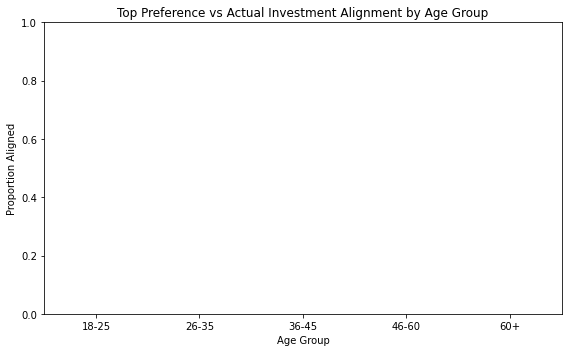

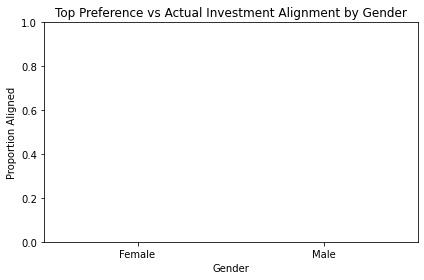

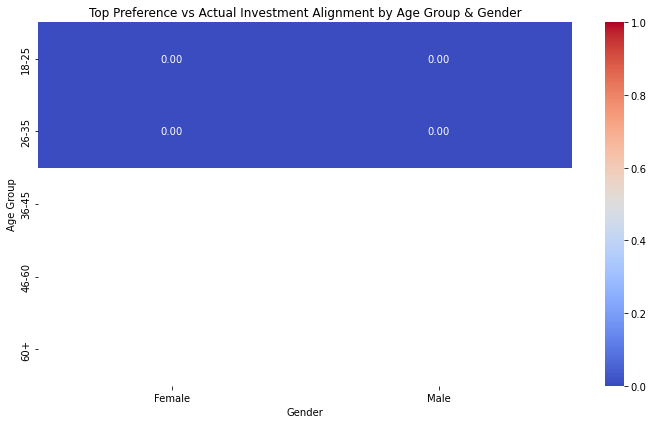

In [11]:
# ----------------------------------------
# Step 10: Top Investment Preference vs Actual Investment Alignment
# ----------------------------------------

# Explode Top Investment Preference if multiple preferences exist
df_pref_al = df.dropna(subset=['Top_Investment_Preference','Avenue']).copy()
df_pref_al = df_pref_al.assign(Top_Investment_Preference=df_pref_al['Top_Investment_Preference'].str.split('|')).explode('Top_Investment_Preference')
df_pref_al['Top_Investment_Preference'] = df_pref_al['Top_Investment_Preference'].str.strip()

# Define a mapping: for each preference, what is considered aligned
pref_to_avenue = {
    'Mutual Funds': ['Mutual_Funds'],
    'Equity Market': ['Equity_Market'],
    'Debentures': ['Debentures'],
    'Government Bonds': ['Government_Bonds'],
    'Fixed Deposits': ['Fixed_Deposits'],
    'PPF': ['PPF'],
    'Gold': ['Gold'],
}

# Compute alignment
def check_pref_alignment(row):
    ideal = pref_to_avenue.get(row['Top_Investment_Preference'], [])
    return int(row['Avenue'] in ideal)

df_pref_al['Aligned'] = df_pref_al.apply(check_pref_alignment, axis=1)

# ----------------------------------------
# 10a. Overall alignment
overall_pref_alignment = df_pref_al['Aligned'].mean()
print(f"Overall Top Preference vs Actual Investment Alignment: {overall_pref_alignment:.2%}")

# 10b. Alignment by Age Group
alignment_pref_age = df_pref_al.groupby('Age_Group')['Aligned'].mean().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=alignment_pref_age.index, y=alignment_pref_age.values, palette="Set3")
plt.title("Top Preference vs Actual Investment Alignment by Age Group")
plt.ylabel("Proportion Aligned")
plt.xlabel("Age Group")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("pref_alignment_by_age_group.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# 10c. Alignment by Gender
alignment_pref_gender = df_pref_al.groupby('gender')['Aligned'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=alignment_pref_gender.index, y=alignment_pref_gender.values, palette="Set2")
plt.title("Top Preference vs Actual Investment Alignment by Gender")
plt.ylabel("Proportion Aligned")
plt.xlabel("Gender")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("pref_alignment_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# 10d. Alignment by Age Group and Gender (heatmap)
alignment_pref_age_gender = df_pref_al.groupby(['Age_Group','gender'])['Aligned'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(alignment_pref_age_gender, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
plt.title("Top Preference vs Actual Investment Alignment by Age Group & Gender")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.tight_layout()
plt.savefig("pref_alignment_by_age_gender.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()
